In [20]:
# Global Shark Attack Incidents:

# Import packages:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Import the data using Pandas

df = pd.read_csv('./Input/GSAF5.csv', encoding = "ISO-8859-1")
display(df.head(3))

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN


In [21]:
# Case Number Duplicates:

# Comparing Case Number and Case Number.1:
comparing = []
for i in range(len(df['Case Number'])):
    if df['Case Number'][i] == df['Case Number.1'][i]:
        comparing.append(True)
    else:
        comparing.append(False)

# Different values:
falsevalues = [i for i, x in enumerate(comparing) if not x]
print("Case Number:",*[df['Case Number'][e] for e in falsevalues])
print("Case Number.1:",*[df['Case Number.1'][e] for e in falsevalues])

# Comparing Case Number and Case Number.2:
comparing_2 = []
for i in range(len(df['Case Number'])):
    if df['Case Number'][i] == df['Case Number.2'][i]:
        comparing_2.append(True)
    else:
        comparing_2.append(False)

# Different values:
falsevalues2 = [i for i, x in enumerate(comparing_2) if not x]
print("\nCase Number:",*[df['Case Number'][e] for e in falsevalues2])
print("Case Number.2:",*[df['Case Number.2'][e] for e in falsevalues2])

# Values that differ seem to be typographical errors.

# In fact, none of the three columns would be valid as a primary key since they contain repeated values:
print('\nCase Number:',len(set(df['Case Number'])),"unique values out of",len(df['Case Number']))
print('Case Number.1:',len(set(df['Case Number.1'])),"unique values out of",len(df['Case Number.1']))
print('Case Number.2:',len(set(df['Case Number.2'])),"unique values out of",len(df['Case Number.2']))


Case Number: 2016.09.15 2016.07.14.4 2016.01.24.b 2015.12.23 2015.10.28.a 2015.07-10 1967.07.05 1962,08.30.b 1961.09.02.R 1952.08.05 1934.01.08.R 1900.00.00.R 1911.07.31.R
Case Number.1: 2016.09.16 2016.07.14.R 2015.01.24.b 2015.11.07 2015.10.28 2015.07.10 1967/07.05 1962.08.30.b 1961.09,06.R 1952.08.04 1934.02.08.R 1919.00.00.R 1911.07.31.T

Case Number: 2015.07-10 1934.01.08.R
Case Number.2: 2015.07.10 1934.02.08.R

Case Number: 5976 unique values out of 5992
Case Number.1: 5975 unique values out of 5992
Case Number.2: 5976 unique values out of 5992


In [22]:
df2 = df.copy()
df2 = df2.drop(['Case Number', 'Case Number.1', 'Case Number.2'], axis=1)

# Cuando tenga las columnas filtradas puedo crear con un apply un case number único mezclando varias columnas.


In [23]:
# Renombrar alguna columna

df2 = df2.rename(columns={"Fatal (Y/N)": "Fatal"})


In [24]:
# Correct incorrect data types

# print(df2.dtypes)

# Age must be an integer

set(df2['Age'])

# Fatal (Y/N) could be a boolean, but I have NaNs...:

import re
prueba = list(set(df2['Fatal']))
print(prueba)
[re.findall("N\s", str(e)) for e in prueba]

df2['Fatal'] = [re.sub('N\s|\sN', 'N', str(e)) for e in df2['Fatal']]
df2['Fatal'] = [re.sub('F', 'Y', str(e)) for e in df2['Fatal']]
df2['Fatal'] = [re.sub('UNKNOWN|#VALUE!', str(np.nan), str(e)) for e in df2['Fatal']]
df2['Fatal'] = [re.sub('n', 'N', str(e)) for e in df2['Fatal']]

# df2['Fatal (Y/N)'].replace({'Y': True}, inplace=True)
# df2['Fatal (Y/N)'].replace({'N': False}, inplace=True)
print(set(df2['Fatal']))

# Cambiar tipo a la columna edad
#df["Year"] = df["Year"].astype(int)

# Ordenar por alguna columna
#df["Year"].value_counts().sort_values()
#df["Year"].value_counts().sort_index()

# Uniones:
# df.loc[df['Transmission'].str.startswith('A'), 'TransType'] = 'Automatic'
# df.loc[df['Transmission'].str.startswith('M'), 'TransType'] = 'Manual'


[nan, 'Y', '#VALUE!', ' N', 'N', 'UNKNOWN', 'N ', 'F', 'n']
{'Y', 'N', 'NaN'}


In [25]:
df2['Fatal'].replace({'NaN': np.nan}, inplace=True)
# display(df2[df2.Fatal.isnull()])
set(df2.Fatal)

{'N', 'Y', nan}

In [26]:
# Missing values:
null_cols = df2.isnull().sum()
null_cols[null_cols > 0]

Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal                      114
Time                      3213
Species                   2934
Investigator or Source      15
href formula                 1
href                         3
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [27]:
# Some columns have relatively few null values while others have thousands of nulls.
# I'm going to remove those columns from the data set using the drop method. 
# Let's remove the columns that have more than 5000 null values in them:

print("Total rows in the datataset:",df2.shape[0])

# Unnamed: 22 and Unnamed: 23: A lot of missing values & no information about the variable. I'm dropping them.

drop_cols = list(null_cols[null_cols > 5000].index)
df2 = df2.drop(drop_cols, axis=1)

Total rows in the datataset: 5992


In [28]:
# Dropping also uninformative columns:
df2 = df2.drop(['Location','Investigator or Source', 'pdf', 'href formula', 'href', 'original order'], axis=1)
display(df2.head(3))

,Date,Year,Type,Country,Area,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,18-Sep-16,2016,Unprovoked,USA,Florida,Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN
1,18-Sep-16,2016,Unprovoked,USA,Florida,Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN
2,18-Sep-16,2016,Unprovoked,USA,Florida,Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN


In [29]:
# Date:

# Voy a intentar sacar el mes, de los que lo tengan:

# print(set(df2['Date']))
  
lista_date = [re.findall("(?i)[a-z]+-", str(e)) for e in df2['Date']] 
# print(lista_date)

lista_date_2 = []
for e in lista_date:
    if len(e)>0:
        lista_date_2.append(e[0][:-1])
    else:
        lista_date_2.append('NaN')
# print(lista_date_2)

# print(set(lista_date_2))
lista_date_2 = [re.sub('Sept', 'Sep', str(e)) for e in lista_date_2]
lista_date_2 = [re.sub('March', 'Mar', str(e)) for e in lista_date_2]
lista_date_2 = [re.sub('Ap$', 'Apr', str(e)) for e in lista_date_2]
lista_date_2 = [re.sub('(?i)mid|Summer|Spanish|Jut', 'NaN', str(e)) for e in lista_date_2]
print(set(lista_date_2))

df2['Month'] = lista_date_2
display(df2.head(3))

{'May', 'Feb', 'NaN', 'Jul', 'Mar', 'Dec', 'Oct', 'Apr', 'Aug', 'Nov', 'Sep', 'Jun', 'Jan'}


,Date,Year,Type,Country,Area,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Month
0,18-Sep-16,2016,Unprovoked,USA,Florida,Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,Sep
1,18-Sep-16,2016,Unprovoked,USA,Florida,Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,Sep
2,18-Sep-16,2016,Unprovoked,USA,Florida,Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,Sep


In [30]:
# display(df2[df2.Month.isnull()])
df2['Month'].replace({'NaN': np.nan}, inplace=True)
# display(df2[df2.Month.isnull()])
set(df2.Month)

{'Apr',
 'Aug',
 'Dec',
 'Feb',
 'Jan',
 'Jul',
 'Jun',
 'Mar',
 'May',
 'Nov',
 'Oct',
 'Sep',
 nan}

In [31]:
# Completing Year variable with Date variable (Date contains some years that are not collected in Year column)

lista_year = [re.findall("[0-9]{4}", str(e)) for e in df2['Date']]
# print(lista_year)

lista_year_2 = []
for e in lista_year:
    if len(e)==1:
        lista_year_2.append(int(e[0]))
    else:
        lista_year_2.append(None)
# print(lista_year_2)

# print(list(df2['Year']).count(0)) # 124

for i in range(len(lista_year_2)):
    if lista_year_2[i] != None:
        if df2['Year'][i] == 0:
            # df2['Year'][i] = lista_year_2[i] # SettingWithCopyWarning: A value is trying to be set on a copy
                                               # of a slice from a DataFrame
            df2.at[i,'Year'] = lista_year_2[i]

# print(list(df2['Year']).count(0)) # 33
      

In [32]:
df2 = df2.drop(['Date'], axis=1)
display(df2.head(3))

,Year,Type,Country,Area,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Month
0,2016,Unprovoked,USA,Florida,Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,Sep
1,2016,Unprovoked,USA,Florida,Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,Sep
2,2016,Unprovoked,USA,Florida,Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,Sep


In [33]:
df3 = df2.copy()
# df3.dtypes

In [34]:
# Values below 1000 in the year variable do not seem very reliable.

setyear = set(df3['Year'][df3['Year']<1000])
for e in setyear:
    df3['Year'].replace({e: np.nan}, inplace=True)
    
# Because NaN is a float, this forces an array of integers with any missing values to become floating point.

# Opción, si no, de convertirlo en str, pero luego no podré hacer binning...:
# df3.Year = df3.Year.dropna().apply(lambda x: str(int(x)))

# print(df3.dtypes)
# display(df3[df3.Year.isnull()])


In [35]:
# Binning:

print(df3['Year'].min())
print(df3['Year'].max())

year_labels = ['XVI','XVII','XVIII','XIX','XX','XXI']
cutoffs = [1499,1599,1699,1799,1899,1999,2099]
century = pd.cut(df2['Year'], cutoffs, labels=year_labels)
# century = pd.cut(df2['Year'], cutoffs)
# century.head()

df3['Century'] = century
display(df3.head(3))

1543.0
2016.0


,Year,Type,Country,Area,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Month,Century
0,2016.0,Unprovoked,USA,Florida,Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,Sep,XXI
1,2016.0,Unprovoked,USA,Florida,Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,Sep,XXI
2,2016.0,Unprovoked,USA,Florida,Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,Sep,XXI


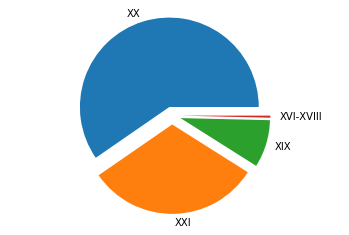

In [44]:
# plt.hist(df3['Century'], bins = 6)

# https://pythonspot.com/matplotlib-pie-chart/
# https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

# [e for e in df3['Century'].value_counts()]
# ['XX','XXI','XIX','XVIII','XVII','XVI']

lista_lista = [e for e in df3['Century'].value_counts()]

# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(lista_lista[0:4], explode=explode, labels=['XX','XXI','XIX','XVI-XVIII'])
plt.axis('equal')
plt.show()

In [37]:
df3['Century'].value_counts()

XX       3545
XXI      1868
XIX       511
XVIII      22
XVII        5
XVI         5
Name: Century, dtype: int64

In [144]:
df3['Month'].value_counts()

Jul    635
Aug    579
Sep    523
Jan    500
Jun    473
Dec    417
Oct    411
Apr    407
Mar    401
Nov    397
May    369
Feb    360
Name: Month, dtype: int64

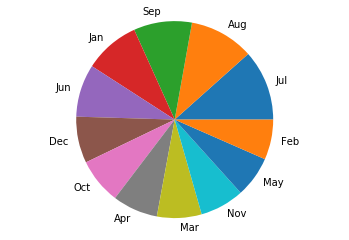

In [42]:
plt.pie([e for e in df3['Month'].value_counts()], labels=['Jul','Aug','Sep','Jan','Jun','Dec','Oct','Apr','Mar','Nov','May','Feb'])
plt.axis('equal')
plt.show()

In [145]:
# Activity:

# print(set(df3['Activity']))

# lista_activity = [re.findall("[A-Z][a-z]+ing", str(e)) for e in df3['Activity']] 
lista_activity = [re.findall("(?i)[a-z]+ing", str(e)) for e in df3['Activity']] 
# print(lista_activity)

lista_activity_2 = []
for e in lista_activity:
    if len(e)>0:
        lista_activity_2.append(e[0])
    else:
        lista_activity_2.append(None)
# print(lista_activity_2)
# print(set(lista_activity_2))

In [146]:
lista_activity_2 = [e.capitalize() if e != None else None for e in lista_activity_2]
print(lista_activity_2)

['Surfing', 'Surfing', 'Surfing', 'Surfing', 'Surfing', 'Fishing', 'Wading', 'Swimming', 'Surfing', 'Boarding', 'Surfing', 'Boarding', 'Spearfishing', 'Surfing', 'Surfing', 'Surfing', 'Wading', 'Snorkeling', 'Boarding', 'Surfing', 'Swimming', 'Swimming', 'Kayaking', 'Lobstering', 'Surfing', 'Surfing', 'Surfing', 'Spearfishing', 'Fishing', 'Fishing', 'Surfing', None, 'Swimming', 'Diving', 'Wading', 'Fishing', 'Fishing', 'Fishing', 'Swimming', 'Fishing', None, 'Surfing', 'Diving', 'Spearfishing', 'Floating', 'Wading', 'Surfing', 'Spearfishing', 'Floating', 'Standing', 'Surfing', 'Swimming', 'Diving', 'Swimming', 'Spearfishing', 'Surfing', 'Surfing', 'Swimming', 'Swimming', 'Swimming', 'Swimming', 'Swimming', 'Swimming', 'Teasing', 'Floating', 'Fishing', 'Surfing', 'Surfing', 'Skiing', 'Swimming', 'Spearfishing', 'Spearfishing', 'Walking', None, 'Fishing', None, 'Snorkeling', 'Surfing', None, 'Surfing', None, 'Surfing', 'Surfing', 'Diving', None, 'Fishing', 'Swimming', 'Surfing', 'Spearfi

In [147]:
lista_aux = []
for e in set(lista_activity_2):
    lista_aux.append((e, lista_activity_2.count(e)))
# print(lista_aux)
lista_aux.sort(key=lambda tup: tup[1], reverse=True)
# print(lista_aux) 

# I'm going to make an "Others" category for those activities with an occurrence < 10:

activities = [e for e in lista_aux if e[1]> 10]
print(activities)

activities2 = [e[0] for e in lista_aux if e[1]> 10]
print(activities2)

[('Swimming', 1047), ('Surfing', 1013), (None, 894), ('Fishing', 687), ('Diving', 509), ('Spearfishing', 395), ('Bathing', 177), ('Wading', 162), ('Standing', 128), ('Boarding', 127), ('Snorkeling', 82), ('Floating', 46), ('Treading', 39), ('Kayaking', 35), ('Skiing', 34), ('Attempting', 30), ('Playing', 25), ('Walking', 24), ('Sitting', 21), ('Rowing', 21), ('Windsurfing', 20), ('Paddling', 16), ('Freediving', 14), ('Sinking', 14), ('Canoeing', 13), ('Sailing', 13), ('Collecting', 12), ('Netting', 11), ('Skindiving', 11), ('Washing', 11)]
['Swimming', 'Surfing', None, 'Fishing', 'Diving', 'Spearfishing', 'Bathing', 'Wading', 'Standing', 'Boarding', 'Snorkeling', 'Floating', 'Treading', 'Kayaking', 'Skiing', 'Attempting', 'Playing', 'Walking', 'Sitting', 'Rowing', 'Windsurfing', 'Paddling', 'Freediving', 'Sinking', 'Canoeing', 'Sailing', 'Collecting', 'Netting', 'Skindiving', 'Washing']


In [148]:
lista_activity_3 = ['Others' if e not in activities2 else e for e in lista_activity_2]
print(set(lista_activity_3))

{'Freediving', 'Netting', 'Sailing', 'Boarding', 'Spearfishing', 'Attempting', 'Washing', 'Kayaking', 'Skiing', 'Standing', 'Bathing', 'Rowing', 'Treading', 'Skindiving', 'Swimming', 'Windsurfing', 'Collecting', 'Surfing', 'Sitting', 'Canoeing', 'Walking', None, 'Paddling', 'Others', 'Diving', 'Snorkeling', 'Fishing', 'Sinking', 'Floating', 'Playing', 'Wading'}


In [149]:
lista_activity_3 = [re.sub('Canoeing|Rowing|Kayaking', 'Paddling', str(e)) if e != None else None for e in lista_activity_3]
lista_activity_3 = [re.sub('Bathing|Floating|Treading', 'Swimming', str(e)) if e != None else None for e in lista_activity_3]
lista_activity_3 = [re.sub('Snorkeling|Skindiving', 'Freediving', str(e)) if e != None else None for e in lista_activity_3]
lista_activity_3 = [re.sub('Wading|Walking','Standing', str(e)) if e != None else None for e in lista_activity_3]
lista_activity_3 = [re.sub('Netting','Fishing', str(e)) if e != None else None for e in lista_activity_3]

In [150]:
print(set(lista_activity_3))

{'Freediving', 'Sailing', 'Boarding', 'Spearfishing', 'Attempting', 'Washing', 'Skiing', 'Standing', 'Swimming', 'Windsurfing', 'Collecting', 'Surfing', 'Sitting', None, 'Paddling', 'Others', 'Diving', 'Fishing', 'Sinking', 'Playing'}


In [151]:
[re.findall("(?i)Attempting", str(e)) for e in df3['Activity']]
[re.findall("(?i)\w+\sBoarding", str(e)) for e in df3['Activity']]
[re.findall("(?i)Playing", str(e)) for e in df3['Activity']]
[re.findall("(?i)Sitting", str(e)) for e in df3['Activity']]
[re.findall("(?i)Collecting", str(e)) for e in df3['Activity']]
[re.findall("(?i)Washing", str(e)) for e in df3['Activity']]


[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [152]:
lista_aux_2 = []
for i in range(len(lista_activity_2)):
    if lista_activity_2[i] == None and df3['Activity'].isnull()[i] == False:
        lista_aux_2.append(df3['Activity'][i])
    else:
        lista_aux_2.append('Ignore')
# print(set(lista_aux_2))

lista_aux_2 = [e.capitalize() for e in lista_aux_2]

lista_aux_3 = []
for e in set(lista_aux_2):
    lista_aux_3.append((e, lista_aux_2.count(e)))
# print(lista_aux_3)
lista_aux_3.sort(key=lambda tup: tup[1], reverse=True)
print(lista_aux_3)


[('Ignore', 5625), ('Fell overboard', 21), ('Sea disaster', 14), ('Fell into the water', 8), ('Murder', 6), ('Boat', 5), ('Shipwreck', 5), ('Jumped into the water', 4), ('Boat capsized', 4), ('Air disaster', 4), ('Jumped overboard', 3), ('Boat swamped', 3), ('Wreck of the schooner pohoiki ', 3), ('Unknown', 3), ('.', 3), ('Jumped overboard ', 2), ('Suicide', 2), ('Knocked overboard', 2), ('Aircraft crashed into sea', 2), ('Hmas parramatta torpedoed & sunk by the u-559', 2), ('Thrown overboard', 2), ('U.s. airforce c124 enroute from hickham air base to japan went down. the 3 survivors fashioned raft from mailbags  & were rescued 3 days after the crash.', 2), ('Dived for a coin', 2), ('Wreck of the state oil company ship permina', 1), ('Fell or jumped overboard from the liner rhynland', 1), ('Wreck of the union steamship company 982-ton iron steamer kafir', 1), ('Grabbed shark & threw it on deck', 1), ('On 6-nov-1942, the german submarine u-68 sank the city of cairo 5 days from cape town

In [153]:
addingactivities = [e for e in lista_aux_3 if e[1]> 5]
print(addingactivities)

addingactivities2 = [e[0] for e in lista_aux_3 if e[1]> 5]
print(addingactivities2)

for i in range(len(df3['Activity'])):
    if df3['Activity'][i] == 'Fell overboard' or df3['Activity'][i] == 'Sea disaster' or df3['Activity'][i] == 'Fell into the water':
        lista_activity_3[i] = 'Sinking'
        
for i in range(len(df3['Activity'])):
    if df3['Activity'][i] == 'Murder':
        lista_activity_3[i] = 'Murder'

[('Ignore', 5625), ('Fell overboard', 21), ('Sea disaster', 14), ('Fell into the water', 8), ('Murder', 6)]
['Ignore', 'Fell overboard', 'Sea disaster', 'Fell into the water', 'Murder']


In [154]:
print(set(lista_activity_3))

{'Freediving', 'Sailing', 'Boarding', 'Spearfishing', 'Attempting', 'Murder', 'Washing', 'Skiing', 'Standing', 'Swimming', 'Windsurfing', 'Collecting', 'Surfing', 'Sitting', None, 'Paddling', 'Others', 'Diving', 'Fishing', 'Sinking', 'Playing'}


In [155]:
df3['ActivityNew'] = lista_activity_3
df3['ActivityNew'].value_counts()

Swimming        1309
Surfing         1013
Fishing          698
Diving           509
Spearfishing     395
Others           361
Standing         314
Boarding         127
Freediving       107
Paddling          85
Sinking           51
Skiing            34
Attempting        30
Playing           25
Sitting           21
Windsurfing       20
Sailing           13
Washing           11
Murder             6
Name: ActivityNew, dtype: int64

In [156]:
# La columna nombre es irrelevante de cara al análisis, pero, en coasiones, contiene información sobre el sexo de la
# persona atacada

# df[df['Name'] == 'male']
# df[df['Name'] == 'female']

df3 = df3.rename(columns={"Sex ": "Sex"})
set(df3['Sex'])

{'.', 'F', 'M', 'M ', 'N', 'lli', nan}

In [157]:
df3['Sex'] = [re.sub('M\s', 'M', str(e)) for e in df3['Sex']]
df3['Sex'] = [re.sub('N|\.|lli', 'nan', str(e)) for e in df3['Sex']]
set(df3['Sex'])

{'F', 'M', 'nan'}

In [158]:
df3['Sex'].replace({'nan': np.nan}, inplace=True)
set(df3['Sex'])

{'F', 'M', nan}

In [159]:
df3['Sex'].value_counts()

M    4837
F     585
Name: Sex, dtype: int64

In [160]:
print(set(df3['Type']))
df3['Type'].value_counts()

{'Sea Disaster', 'Unprovoked', 'Provoked', 'Invalid', 'Boat', 'Boating'}


Unprovoked      4386
Provoked         557
Invalid          519
Sea Disaster     220
Boat             200
Boating          110
Name: Type, dtype: int64

In [163]:
# Quitar espacios

# set(df3['Country'])

df3['Country'].value_counts()


USA                               2116
AUSTRALIA                         1279
SOUTH AFRICA                       565
PAPUA NEW GUINEA                   133
NEW ZEALAND                        125
BRAZIL                             102
BAHAMAS                             98
MEXICO                              81
ITALY                               71
FIJI                                62
PHILIPPINES                         59
REUNION                             57
NEW CALEDONIA                       51
MOZAMBIQUE                          44
CUBA                                42
SPAIN                               40
INDIA                               37
EGYPT                               36
CROATIA                             34
JAPAN                               32
PANAMA                              32
SOLOMON ISLANDS                     29
IRAN                                29
GREECE                              25
HONG KONG                           24
JAMAICA                  

In [ ]:
# Reiniciar el Kernel si modificamos una función, porque habrá que volver a importarla!